**Mainflow Task 4**

**Task 4: Regression Analysis**

Objective: Build a regression model to predict house prices based on various features using linear regression.

**1. Dataset Selection**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_prices=pd.read_csv("house_prices.csv")

In [3]:
house_prices.head()

,Size,Location,Number of Rooms,Price
0,2654,Urban,2,203254
1,2864,Rural,8,259646
2,3261,Rural,2,384863
3,2390,Suburban,5,339581
4,3100,Suburban,7,366586


In [4]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             1000 non-null   int64 
 1   Location         1000 non-null   object
 2   Number of Rooms  1000 non-null   int64 
 3   Price            1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [5]:
house_prices.isnull().sum()

,0
Size,0
Location,0
Number of Rooms,0
Price,0


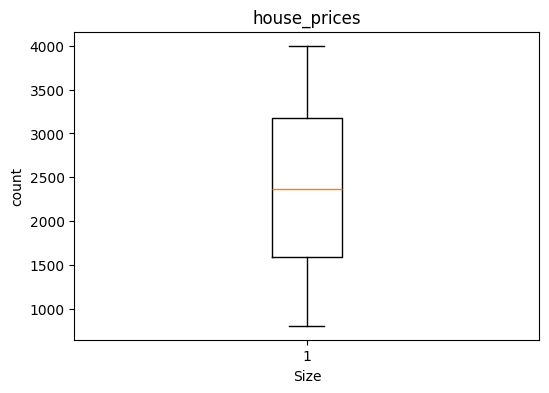

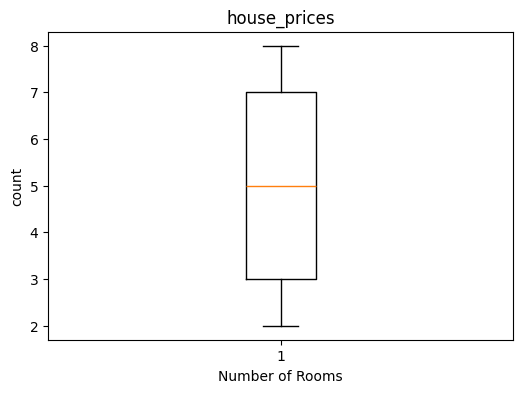

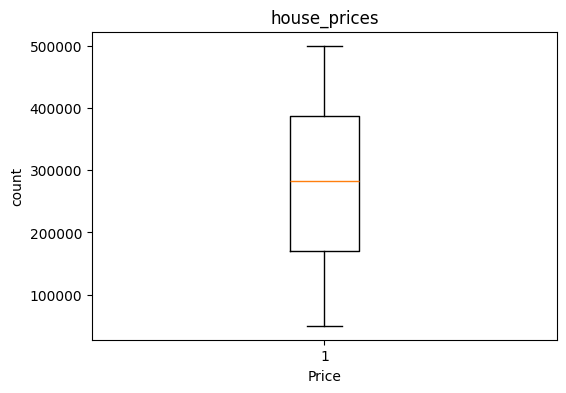

In [10]:
for col in house_prices:
  if (house_prices[col].dtype == 'float64' or house_prices[col].dtype == 'int64'):
    plt.figure(figsize=(6,4))
    plt.boxplot(house_prices[col])
    plt.title("house_prices")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [11]:
from sklearn.preprocessing import  MinMaxScaler

In [12]:
columns=['Size','Number of Rooms']

In [13]:
# Using MinMaxScaler
minmax_scaler = MinMaxScaler()
house_prices_minmax_scaled = house_prices.copy()
house_prices_minmax_scaled[columns] = minmax_scaler.fit_transform(house_prices[columns])

In [14]:
house_prices_minmax_scaled[columns]

,Size,Number of Rooms
0,0.578321,0.000000
1,0.644110,1.000000
2,0.768484,0.000000
3,0.495614,0.500000
4,0.718045,0.833333
...,...,...
995,0.596491,1.000000
996,0.878759,0.166667
997,0.639724,0.166667
998,0.202381,0.166667


In [15]:
# Label Encoding
# labeling the 'Location' column


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
house_prices['Location'] = label_encoder.fit_transform(house_prices['Location'])

house_prices['Location']

,Location
0,2
1,0
2,0
3,1
4,1
...,...
995,1
996,2
997,0
998,2


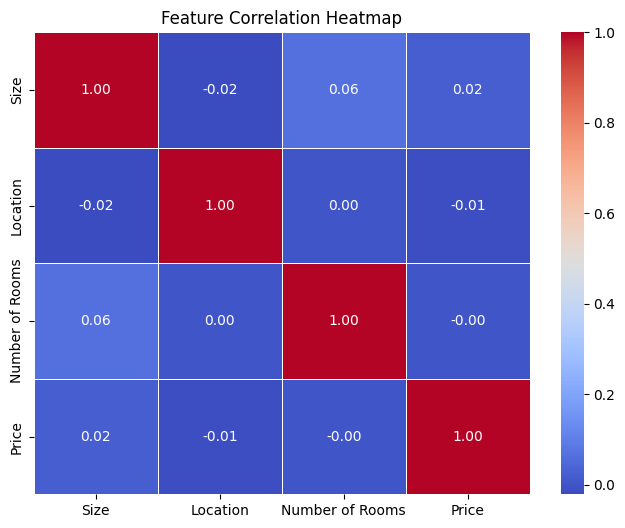

In [16]:
# Compute correlation matrix
correlation_matrix = house_prices.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
# Identify weakly correlated features (absolute correlation < 0.1 with Price)
low_impact_features = correlation_matrix["Price"].abs().sort_values()
low_impact_features = low_impact_features[low_impact_features < 0.1].index.tolist()

In [19]:
low_impact_features

['Number of Rooms', 'Location', 'Size']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
# Split features (X) and target variable (y)
X = house_prices.drop(columns=["Price"])
y = house_prices["Price"]


In [28]:
# Split dataset into 80% training and 20% testing (with random seed for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train , X_test

(     Size  Location  Number of Rooms
 29   1625         1                8
 535  1326         0                7
 695  3257         1                4
 557  1435         2                6
 836  3276         2                8
 ..    ...       ...              ...
 106  3680         0                5
 270  1841         1                4
 860  2456         2                3
 435  2948         1                2
 102  2726         1                2
 
 [800 rows x 3 columns],
      Size  Location  Number of Rooms
 521  3243         1                6
 737  3470         1                7
 740  3957         0                4
 660  1549         1                2
 411  1875         1                7
 ..    ...       ...              ...
 408  2531         1                5
 332  1345         2                6
 208  2583         0                4
 613  3636         0                2
 78   3064         0                7
 
 [200 rows x 3 columns])

In [30]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [33]:
# Print Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 107328.47
Mean Squared Error (MSE): 16170639498.35
Root Mean Squared Error (RMSE): 127163.83
R-squared (R²): -0.00


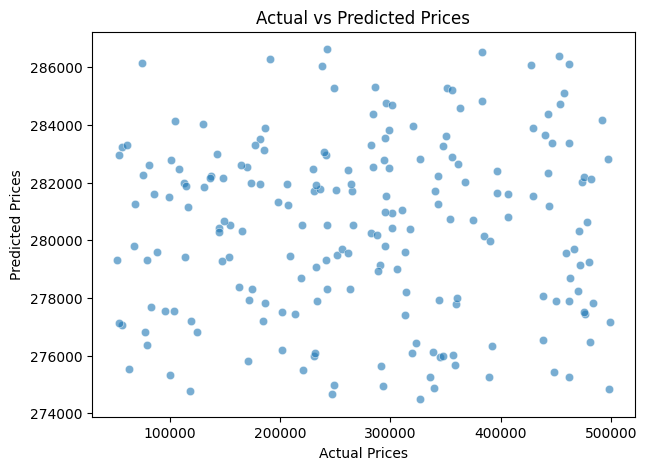

In [37]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()